In [13]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

# Scrape example news data
url = "https://example.com/news"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Extract data and save to CSV
data = {"Title": [], "Content": []}
for article in soup.find_all('article'):
    data["Title"].append(article.find('h1').text)
    data["Content"].append(article.find('p').text)

df = pd.DataFrame(data)
df.to_csv('scraped_data.csv', index=False)
print("Data collected and saved to scraped_data.csv")


Data collected and saved to scraped_data.csv


In [15]:
from textblob import TextBlob
import pandas as pd

# Load data
try:
    df = pd.read_csv('scraped_data.csv')
except FileNotFoundError:
    print("The file 'scraped_data.csv' was not found. Ensure it exists in the correct directory.")
    exit()

# Ensure the 'Content' column exists
if 'Content' not in df.columns:
    print("The 'Content' column is missing in the dataset. Please verify the column names.")
    exit()

# Remove rows with missing or invalid data in 'Content'
df = df.dropna(subset=['Content'])

# Sentiment Analysis
try:
    df['Polarity'] = df['Content'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
    print("Sentiment analysis completed successfully.")
except Exception as e:
    print(f"An error occurred during sentiment analysis: {e}")
    exit()

# Save the processed data
output_file = 'processed_data.csv'
try:
    df.to_csv(output_file, index=False)
    print(f"Processed data saved to '{output_file}'.")
except Exception as e:
    print(f"An error occurred while saving the data: {e}")


Sentiment analysis completed successfully.
Processed data saved to 'processed_data.csv'.


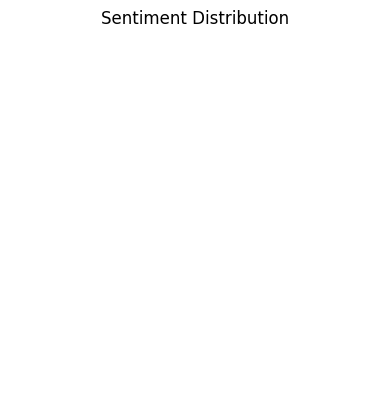

No positive content available for word cloud.
No negative content available for word cloud.


In [17]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd

# Load processed data
df = pd.read_csv('processed_data.csv')

# Remove rows with missing or empty Content
df = df.dropna(subset=['Content'])
df = df[df['Content'].str.strip() != '']

# Categorize sentiment
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Polarity'].apply(categorize_sentiment)

# Pie Chart
sentiment_counts = df['Sentiment'].value_counts()
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.show()

# Word Cloud
positive_text = ' '.join(df[df['Sentiment'] == 'Positive']['Content'])
negative_text = ' '.join(df[df['Sentiment'] == 'Negative']['Content'])

# Generate Positive Word Cloud
if positive_text.strip():  # Check if the text is not empty
    positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
    plt.imshow(positive_wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Positive Word Cloud')
    plt.show()
else:
    print("No positive content available for word cloud.")

# Generate Negative Word Cloud
if negative_text.strip():  # Check if the text is not empty
    negative_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(negative_text)
    plt.imshow(negative_wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Negative Word Cloud')
    plt.show()
else:
    print("No negative content available for word cloud.")
